In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# K-Means Clustering with Python

__K-Means Clustering__ is a popular unsupervised machine learning algorithm. K-Means clustering is used to find intrinsic groups within the unlabeled dataset and draw inferences from them. In this kernel, we'll implement K-Means clustering to find intrinsic groups within the dataset that display the same __status_type__ behavior. The __status_type__ behavior variable consists of posts of a different nature (video, photos, statuses and links).  

# Introduction to K-Means Clustering

Machine learning algorithms can be broadly classified into two categories - supervised and unsupervised learning. In unsupervised learning, there is no target variable. The dataset only has input variables which describe the data.


__K-Means clustering__ is an unsupervised learning algorithm. It's used when we have unlabeled data which is data without defined categories or groups. The algorithm follows an easy or simple way to classify a given data set through a certain number of clusters, fixed apriori. K-Means algorithm works iteratively to assign each data point to one of K groups based on the features that are provided. Data points are clustered based on feature similarity.

## Applications of clustering

- K-Means clustering is widely used for many applications which include:

    - Image segmentation
    - Customer segmentation
    - Species clustering
    - Anomaly detection
    - Clustering languages

## K-Means Clustering intuition

- K-Means clustering is used to find intrinsic groups within the unlabeled dataset and draw inferences from them. It's based on centroid-based clustering.


- __Centroid__: a centroid is a data point at the center of a cluster. In centroid-based clustering, clusters are represented by a centroid. It is an iterative algorithm in which the notion of similarity is derived by how close a data point is to the centroid of the cluster. K-Means clustering algorithm uses an iterative procedure to deliver a final result. The algorithm requires a number of clusters K and the dataset as input. The dataset is a collection of features for each data point. The algorithm starts with initial estimates for the K centroids. The algorithm then iterates between two steps:

### Data assignment step

Each centroid defines one of the clusters. In this step, each data point is assigned to its nearest centroid, which is based on the squared Euclidean distance. So, if ci is the collection of centroids in set C, then each data point is assigned to a cluster based on minimum Euclidean distance.

### Centroid update step

In this step, the centroids are recomputed and updated. This is done by taking the mean of all data points assigned to that centroid's cluster.


The algorithm then iterates between step 1 and step 2 until a stopping criteria is met. Stopping criteria means no data points change the clusters, the sum of the distances is minimized or some maximum number of iterations is reached. This algorithm is guaranteed to converge to a result. The result may be a local optimum meaning that assessing more than one run of the algorithm with randomized starting centroids may give a better outcome.

## Choosing the value of K

The K-Means algorithm depends upon finding the number of clusters and data labels for a pre-defined value of K. To find the number of clusters in the data, we need to run the K-Means clustering algorithm for different values of K and compare the results. So, the performance of K-Means algorithm depends upon the value of K. We should choose the optimal value of K that gives us the best performance. There are different techniques available to find the optimal value of K. The most common technique is the __elbow method__ which is described below.

## Elbow method

The elbow method is used to determine the optimal number of clusters in K-Means clustering. The elbow method plots the value of the cost function produced by different values of K.

If K increases, average distortion will decrease. Then each cluster will have fewer constituent instances, and the instances will be closer to their respective centroids. However, the improvements in average distortion will decline as K increases. The value of K at which improvement in distortion declines the most is called the elbow, at which we should stop dividing the data into further clusters.

# data

In [28]:
# upload the dataset

df = pd.read_csv('./raw_data/Live.csv')
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


## data analysis

In [29]:
df.shape

(7050, 16)

### view summary of dataset

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

### check for missing values in dataset

In [31]:
df.isnull().sum()

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

In [32]:
# drop 'Column1', 'Column2', 'Column3' and 'Column4'

df = df.drop(columns=['Column1', 'Column2', 'Column3', 'Column4'], axis=1)
df.isnull().sum()

status_id           0
status_type         0
status_published    0
num_reactions       0
num_comments        0
num_shares          0
num_likes           0
num_loves           0
num_wows            0
num_hahas           0
num_sads            0
num_angrys          0
dtype: int64

### check for duplicates

In [33]:
df.duplicated().sum()

51

In [34]:
# drop duplicates

df = df.drop_duplicates(keep='first')
df.shape

(6999, 12)

In [35]:
df.duplicated().sum()

0

### view the statistical summary of numerical variables

In [36]:
df.describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,6999.000000,6999.000000,6999.000000,6999.000000,6999.000000,6999.000000,6999.000000,6999.000000,6999.000000
mean,224.994571,225.552079,40.258608,209.946707,12.751536,1.252893,0.697957,0.232605,0.110159
std,452.880746,892.743010,132.046903,439.550330,40.106872,8.725551,3.970912,1.481105,0.688582
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,58.000000,4.000000,0.000000,57.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,216.000000,22.000000,4.000000,182.000000,3.000000,0.000000,0.000000,0.000000,0.000000
max,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000


### explore categorical variables

#### status_id

In [37]:
print(f"There are {len(df['status_id'].unique())} ({round(len(df['status_id'].unique())/len(df)*100,2)} %) unique values for 'status_id'")

There are 6997 (99.97 %) unique values for 'status_id'


There are 6997 unique labels in __status_id__. The total number of instances in the dataset (without duplicates) is 6999. So, it is approximately a unique identifier for each instance. Thus, this is not a variable we can use. Let's drop it.

In [38]:
df = df.drop(['status_id'], axis=1)
df.shape

(6999, 11)

#### status_published

In [39]:
len(df['status_published'].unique())

6913

In [40]:
print(f"There are {len(df['status_published'].unique())} ({round(len(df['status_published'].unique())/len(df)*100,2)} %) unique values for 'status_published'")

There are 6913 (98.77 %) unique values for 'status_published'


Again, the number of unique labels in __status_published__ (6913) is close to the total number of instances in the dataset (without duplicates). Meaning it's also approximately a unique identifier for each instance. Thus, this is not a variable we can use. Let's drop it.

In [41]:
df = df.drop(['status_published'], axis=1)
df.shape

(6999, 10)

#### status_type

In [42]:
df['status_type'].unique()

array(['video', 'photo', 'link', 'status'], dtype=object)

There are 4 categories of labels in __status_type__. Thus, we should keep this variable.


So, only one categorical variable remains in the dataset. We'll encode this variable later.

# Feature engineering

## Define features and target

In [43]:
X = df

y = df['status_type']

## Encode categorical features

In [44]:
from sklearn.preprocessing import LabelEncoder

# instantiate the LabelEncoder
label_encoder = LabelEncoder()

# fit it to the feature
X['status_type'] = label_encoder.fit_transform(X['status_type'])

# find the encoded classes
print(f'The label Encoder has encoded the status type into {label_encoder.classes_}')

# transform the target
y = label_encoder.transform(y)

The label Encoder has encoded the status type into ['link' 'photo' 'status' 'video']


In [45]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6999 entries, 0 to 7049
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   status_type    6999 non-null   int64
 1   num_reactions  6999 non-null   int64
 2   num_comments   6999 non-null   int64
 3   num_shares     6999 non-null   int64
 4   num_likes      6999 non-null   int64
 5   num_loves      6999 non-null   int64
 6   num_wows       6999 non-null   int64
 7   num_hahas      6999 non-null   int64
 8   num_sads       6999 non-null   int64
 9   num_angrys     6999 non-null   int64
dtypes: int64(10)
memory usage: 601.5 KB


In [46]:
X.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,3,529,512,262,432,92,3,1,1,0
1,1,150,0,0,150,0,0,0,0,0
2,3,227,236,57,204,21,1,1,0,0
3,1,111,0,0,111,0,0,0,0,0
4,1,213,0,0,204,9,0,0,0,0


## Feature Scaling

In [47]:
from sklearn.preprocessing import MinMaxScaler

cols = X.columns
scaler = MinMaxScaler()

X = scaler.fit_transform(X)

X = pd.DataFrame(X, columns=[cols])
X.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1.000000,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0
1,0.333333,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0
2,1.000000,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0
3,0.333333,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0
4,0.333333,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0


# K-Means model with 2 clusters

In [48]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=42)

kmeans.fit(X)

/home/eduardo/.pyenv/versions/3.10.6/envs/inegi/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2, random_state=42)

In [49]:
kmeans.cluster_centers_

array([[9.55547301e-01, 6.46758659e-02, 2.67693099e-02, 2.93921024e-02,
        5.71514088e-02, 4.72005672e-02, 8.19641464e-03, 9.67717512e-03,
        7.95385019e-03, 7.21372765e-03],
       [3.28457550e-01, 3.72026085e-02, 7.30466032e-04, 7.35802291e-04,
        3.67138471e-02, 2.03802595e-03, 2.20070055e-03, 1.17568941e-03,
        2.44016808e-03, 1.26575642e-03]])

In [53]:
kmeans.cluster_centers_.shape

(2, 10)

- the KMeans algorithm clusters data by trying to separate samples in n groups of equal variances, minimizing a criterion know as inertia, or within-cluster sum-of-squares __Inertia__, or the within-cluster sum of squares criterion, can be recognized as a measure of how internally coherent clusters are.


- the KMeans algorithm divides a set of N samples X into K disjoint clusters C, each described by mean j of the samples in the cluster. The means are commonly called the cluster __centroids__.


- the KMeans algorithm aims to choose centroids that minimize the inertia, or within-cluster sum of squared criterion. 

__Inertia__:


- __Inertia__ is not a normalized metric;


- the lower values of inertia are better and zero is optimal;


- but in very high-dimensional spaces, euclidean distances tend to become inflated (this is an instance of __curse of dimensionality__);


- running a dimensionality reduction algorithm such as PCA prior to k-means clustering can alleviate this problem and speed up the computations;


- we can calculate model inertia as follows:

In [50]:
kmeans.inertia_

228.8907492806654

- the lower the model inertia, the better the model fits;


- we can see that the model has a very high inertia. Thus, this is not a good model fit to the data.

## Check quality of weak classification by the model

In [51]:
labels = kmeans.labels_

# check how many of the samples were correctly labeled
correct_labels = sum(y == labels)

print(f'Result: {correct_labels} out of {len(y)} samples were labeled correctly')

Result: 4244 out of 6999 samples were labeled correctly


In [52]:
print(f'Accuracy score: {round(correct_labels/len(y),2)}')

Accuracy score: 0.61


We have achieved a classification accuracy of 61% with our supervised model

## Use elbow method to find optimal number of clusters

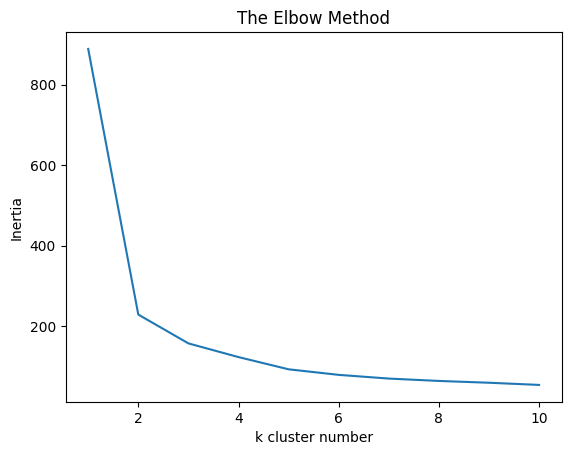

In [55]:
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init = 'k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)
   
plt.plot(range(1,11), inertias)
plt.xlabel('k cluster number')
plt.title('The Elbow Method')
plt.ylabel('Inertia')
plt.show()